# numpy

## Задача №1. Скользящее окно

Реализовать функцию скользящего окна для заданного одномерного ряда данных, формирующую из него матрицу по следующему правилу:

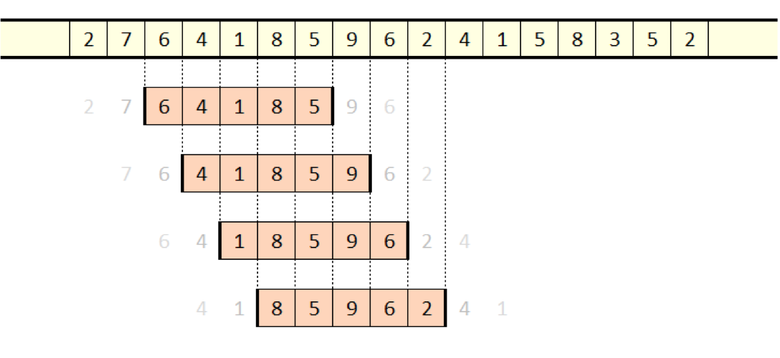

Аргументы функции:

*x_array* - одномерный массив **numpy.ndarray**

*w* - ширина окна для итоговой матрицы

*step* - шаг окна по исходному одномерному ряду данных

Результат:

*A_matrix* - матрица скользящего среднего

In [2]:
def sliding_window(x_array, w, step = 1):
    A_matrix = []
    A_matrix1 = []
    for i in range(0, len(x_array) - w + 1, step):
        for j in range(i, i + w):
            A_matrix1.append(x_array[j])
        A_matrix.append(A_matrix1)
        A_matrix1 = []

    return A_matrix

In [3]:
import numpy as np
# проверка 1
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])
print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

# проверка 2
window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# **Анализ данных по доходу населения UCI Adult**


Автор материала: Юрий Кашницкий (@yorko в Slack ODS). Материал распространяется на условиях лицензии Creative Commons CC BY-NC-SA 4.0. Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult)**

Уникальные значения признаков (больше информации по ссылке выше):

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [4]:
import pandas as pd
import numpy as np

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,
                   names = ["age", "workclass", "fnlwgt", "education",
                    "education-num", "marital-status", "occupation", "relationship",
                    "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary"])

list_of_objects = data.dtypes.axes[0][data.dtypes == "object"]
data[list_of_objects] = data[list_of_objects].astype("string")

data.head()

/var/folders/4r/9zv7kzq961j_k50fwxj4sr7c0000gn/T/ipykernel_3383/1878265901.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep = ", ", header=None,


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## **0. Изучить в документации методы groupby и agg**

## **1. Сколько мужчин и женщин (признак sex) представлено в этом наборе данных?**

### Визуализировать результат

sex
Female    10771
Male      21790
dtype: int64

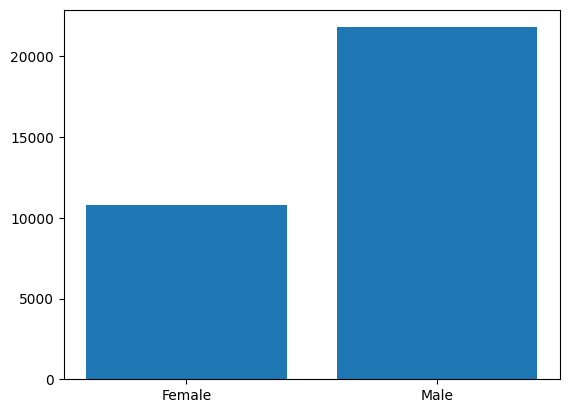

In [6]:
import matplotlib.pyplot as plt
df = data.groupby(['sex']).size()
plt.bar(df.index,df.values, linewidth = 2)
data.groupby(['sex']).size()

## **2. Каков средний возраст (признак age) женщин?**

In [7]:
df = data.groupby(['sex']).get_group('Female')
df['age'].mean()

36.85823043357163

## **3. Какова доля граждан Германии (признак native-country)?**

In [8]:
d = len(data.groupby(['native-country']).get_group('Germany'))/len(data)
print(d)

0.004207487485028101


## **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?**

### Визуализировать результат

Среднее значение: 
 salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64
Среднеквадратичное отклонение:
 salary
<=50K    14.020088
>50K     10.519028
Name: age, dtype: float64


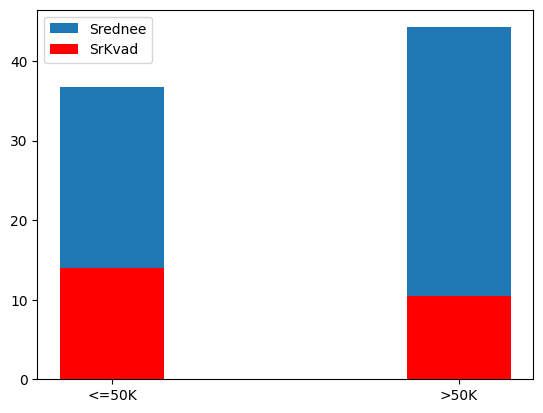

In [9]:
df = data.groupby('salary')
d1 = df['age'].mean()
d2 = df['age'].std()
width = 0.3
plt.bar(d1.index,d1.values, width = 0.3, label='Srednee')
plt.bar(d2.index, d2.values, color = 'red', width = 0.3, label='SrKvad')
plt.legend()
print('Среднее значение: \n', d1)
print('Среднеквадратичное отклонение:\n', d2)

## **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)**

In [10]:
df = data.groupby(['salary']).get_group('>50K')
set(df['education'].tolist()) 
#Ответ: Нет

{'10th',
 '11th',
 '12th',
 '1st-4th',
 '5th-6th',
 '7th-8th',
 '9th',
 'Assoc-acdm',
 'Assoc-voc',
 'Bachelors',
 'Doctorate',
 'HS-grad',
 'Masters',
 'Prof-school',
 'Some-college'}

## **7. Выведите статистику возраста для каждой расы (признак race) и каждого пола. Используйте groupby и describe. Найдите таким образом максимальный возраст мужчин расы Amer-Indian-Eskimo.**

In [11]:
df = data.groupby(['race', 'sex']).describe()
df
#Ответ:82

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                         fnlwgt                 ...  \
                             75%   max    count           mean  ...   
race               sex                                          ...   
Amer-Indian-Eskimo Female  46.00  80.0    119.0  112950.731092  ...   
                   Male    45.00  82.0    192.0  125715.364583  ...   
Asian-Pac-Islander Female  43.75  75.0    346.0  147452.075145  ...   
                   Male    46.00  90.0    693.0  166175.865801  ...   
Black              Female  46.00  90.0   1555.0  212971.387781  ...   
                   Male    46.00  90.0   1569.0  242920.644997  ...   
Other              Female  39.00  74.0    109.0  172519.642202  ...   
                   Male    42.00  77.0    162.0  213679.104938  ...   
White              Female  46.00  90.0   8642.0  183549.966906  ...   
                   Male    49.00  90.0  19174.0  188987.386148  ...   

                          capital-loss         hours-per-week             \
                                   75%     max          count       mean   
race               sex                                                     
Amer-Indian-Eskimo Female          0.0  1721.0          119.0  36.579832   
                   Male            0.0  1980.0          192.0  42.197917   
Asian-Pac-Islander Female          0.0  2258.0          346.0  37.439306   
                   Male            0.0  2457.0          693.0  41.468975   
Black              Female          0.0  4356.0         1555.0  36.834084   
                   Male            0.0  2824.0         1569.0  39.997451   
Other              Female          0.0  1740.0          109.0  35.926606   
                   Male            0.0  2179.0          162.0  41.851852   
White              Female          0.0  4356.0         8642.0  36.296691   
                   Male            0.0  3770.0        19174.0  42.668822   

                                                                   
                                 std  min   25%   50%   75%   max  
race               sex                                             
Amer-Indian-Eskimo Female  11.046509  4.0  35.0  40.0  40.0  84.0  
                   Male    11.596280  3.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  12.479459  1.0  35.0  40.0  40.0  99.0  
                   Male    12.387563  1.0  40.0  40.0  45.0  99.0  
Black              Female   9.419960  2.0  35.0  40.0  40.0  99.0  
                   Male    10.909413  1.0  40.0  40.0  40.0  99.0  
Other              Female  10.300761  6.0  30.0  40.0  40.0  65.0  
                   Male    11.084779  5.0  40.0  40.0  40.0  98.0  
White              Female  12.190951  1.0  30.0  40.0  40.0  99.0  
                   Male    12.194633  1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

## **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

### Визуализировать результат

Количество женатых мужчин:
5965
Количество холостых мужчин:
697


<BarContainer object of 2 artists>

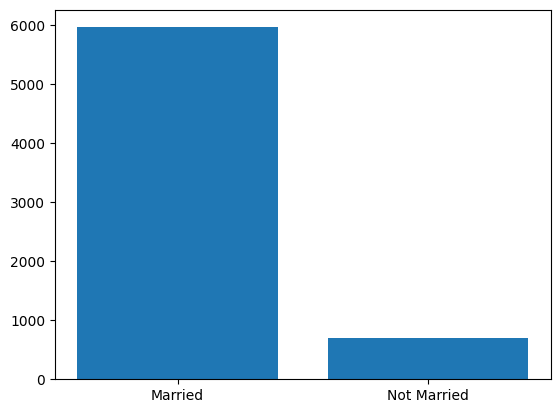

In [31]:
df = data.groupby('salary').get_group('>50K')
df = df[df['sex'] == 'Male']
lst = df['marital-status'].tolist()
x = lst.count('Married-civ-spouse') + lst.count('Married-spouse-absent') + lst.count('Married-AF-spouse')
y = len(lst) - (lst.count('Married-civ-spouse') + lst.count('Married-spouse-absent') + lst.count('Married-AF-spouse'))
print('Количество женатых мужчин:')
print(x)
print('Количество холостых мужчин:')
print(y)
d2 = [x, y]
d1 = ['Married', 'Not Married']
plt.bar(d1,d2)
# Женатых больше

## **9. Какое максимальное число часов человек работает в неделю (признак hours-per-week)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [13]:
df = data
max_hour = max(df['hours-per-week'])
print(f'Максимальное число часов в неделю: {max_hour}')
print(f'Кол-во людей, работающих {max_hour} часов в неделю: {len(df[df["hours-per-week"] == max_hour])}')
df1 = data.groupby('salary').get_group('>50K')
print(f'Кол-во людей, работающих {max_hour} часов и зарабатывающих много : {len(df1[df1["hours-per-week"] == max_hour])}')
print(f'Доля зарабатывающих много: {25/85*100} %')

Максимальное число часов в неделю: 99
Кол-во людей, работающих 99 часов в неделю: 85
Кол-во людей, работающих 99 часов и зарабатывающих много : 25
Доля зарабатывающих много: 29.411764705882355 %


## **10. Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).**

### Визуализировать результат

salary                          <=50K      >50K 
native-country                                  
?                           40.164760  45.547945
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary             

<Axes: xlabel='native-country'>

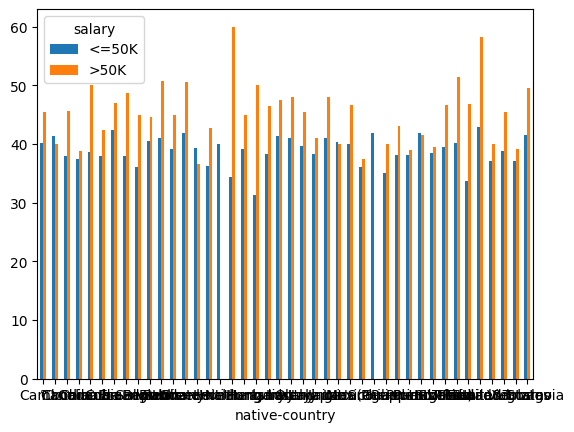

In [26]:
df = pd.crosstab(data['native-country'],data['salary'], values = data['hours-per-week'], aggfunc = np.mean)
print(df)
df.plot.bar(rot = 0)